In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def format_international_number(number):
    return "{:,.2f}".format(number)

In [2]:
os.chdir("C:\\Users\\ashut\\Desktop\\AnalytixLab Classes\\python teram 2\\Python Foundation Case Study 2 - Credit Card Case Study\\Case Study 2 - Credit Card Case Study")
Credit_Card = pd.read_excel('Credit Card Data.xlsx')
Customer_acqu = pd.read_csv('Customer Acqusition.csv')
Repayment =pd.read_csv('Repayment.csv')
Spend =pd.read_csv('spend.csv')

# Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the customers spend & repayment behavior.
## 1. In the above dataset,
 ### a. In case age is less than 18, replace it with mean of age values.
 ### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
####     (customer’s limit provided in acquisition table is the per transaction limit on his card)
 ### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [4]:
#a In case age is less than 18, replace it with mean of age values.
mean_age = Customer_acqu['Age'].loc[Customer_acqu['Age'] >= 18].mean()
Customer_acqu['Age'].loc[Customer_acqu['Age'] < 18] = mean_age

C:\Users\ashut\AppData\Local\Temp\ipykernel_21576\145365371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_acqu['Age'].loc[Customer_acqu['Age'] < 18] = mean_age
C:\Users\ashut\AppData\Local\Temp\ipykernel_21576\145365371.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '48.52127659574468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Customer_acqu['Age'].loc[Customer_acqu['Age'] < 18] = mean_age


In [5]:
#b In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

Spend=Spend.merge(Customer_acqu[['Customer','Limit']], on= 'Customer', how='left')
Spend['Amount']=np.where(Spend['Amount']>Spend['Limit'],Spend['Limit']*0.5,Spend['Amount'])
# Spend.drop(['Limit_x','Limit_y'],axis=1)

In [6]:
#c Incase the repayment amount is more than the limit, replace the repayment with the limit.
Repayment = Repayment.merge(Customer_acqu[['Customer', 'Limit']], on='Customer', how='left')
Repayment['Amount'] = np.where(Repayment['Amount'] > Repayment['Limit'], Repayment['Limit'], Repayment['Amount'])

## 2. From the above dataset create the following summaries:
 ### a. How many distinct customers exist?
 ### b. How many distinct categories exist?
 ### c. What is the average monthly spend by customers?
 ### d. What is the average monthly repayment by customers?
 ### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
#### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
#### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)
 ### f. What are the top 5 product types?
 ### g. Which city is having maximum spend?
 ### h. Which age group is spending more money?
 ### i. Who are the top 10 customers in terms of repayment?

In [8]:
# a. How many distinct customers exist?
print(f"The Number of Distinct Customer are: {Customer_acqu['Customer'].nunique()}")

The Number of Distinct Customer are: 100


In [9]:
# b. How many distinct categories exist?
print(f"The Number of Distinct Categories are: \n{Customer_acqu['Product'].unique()}")
# Customer_acqu

The Number of Distinct Categories are: 
['Gold' 'Silver' 'Platimum']


In [10]:
 #c What is the average monthly spend by customers?
print(f"Average Monthly Spend by the Customer are : {(Spend['Amount'].mean()).round(2)}")
# Spend.info()

Average Monthly Spend by the Customer are : 146520.72


In [11]:
#d What is the average monthly repayment by customers?
Repayment
monthly_repayment = Repayment[['Customer', 'Month','Amount']].groupby(['Customer', 'Month']).sum().mean().round(2)
print(f"The Average Monthly Repayment Done by the Customer is : {monthly_repayment[0]}")

The Average Monthly Repayment Done by the Customer is : 191243.06


C:\Users\ashut\AppData\Local\Temp\ipykernel_21576\3023936566.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The Average Monthly Repayment Done by the Customer is : {monthly_repayment[0]}")


In [12]:
#e If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
mspend = Spend[['Amount','Month']].groupby('Month').sum()
mrepayment = Repayment[['Amount','Month']].groupby('Month').sum()
monthly_profit = mrepayment - mspend
positive_profit = monthly_profit[monthly_profit > 0]
monthly_interest = positive_profit * 0.029
total_profit = monthly_interest.sum()
# 
print(f" The profit  Amount for the bank for each month With rate of intrest (2.9%) is {total_profit.round(3)} ")


 The profit  Amount for the bank for each month With rate of intrest (2.9%) is Amount    1219447.257
dtype: float64 


In [13]:
# F What are the top 5 product types??
top_product = Spend['Type'].value_counts().head(5)
print(f"Top 5 product types are: \n{top_product}")

Top 5 product types are: 
Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64


In [14]:
Spend.rename(columns={'Limit': 'Spend_Limit'}, inplace=True)
Customer_Spend=Customer_acqu.merge(Spend,on='Customer', how='left')
Customer_Spend=Customer_Spend.drop(['SL No:','Sl No:'],axis=1)
Customer_Spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Spend_Limit
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,500000
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,3-Jan-04,PETRO,410556.13,500000
2,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,500000
3,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,25-Jan-04,FOOD,484342.47,500000
4,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,17-Jan-05,CAMERA,369694.07,500000
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,100000
1496,A97,58.0,TRIVANDRUM,Platimum,10000,C20,Govt,12-Jan-04,AUTO,5000.00,10000
1497,A98,51.0,CALCUTTA,Platimum,10001,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,10001
1498,A99,35.0,CALCUTTA,Platimum,10002,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,10002


In [15]:
# g. Which city is having maximum spend?
max_spend=Customer_Spend[['City','Amount']].groupby('City').sum()
max_spend = max_spend.sort_values('Amount',ascending=False).reset_index()
print(F"The City with Maximum Spend : \n {max_spend.head(3).round(2)}")

The City with Maximum Spend : 
         City       Amount
0     COCHIN  45963513.50
1   CALCUTTA  41108132.30
2  BANGALORE  40461647.02


In [16]:
# h. Which age group is spending more money?
Customer_Spend
Customer_Spend['Age_Group'] = pd.cut(Customer_Spend.Age,bins=[0, 30, 50, 75, 100], labels=['0-30', '31-50', '51-75','76+'])
age_spend=Customer_Spend[['Age_Group','Amount']].groupby('Age_Group').sum()
print(F"The Age Which is spending More are : \n {age_spend.sort_values(by = 'Amount',ascending = False).reset_index()}")

The Age Which is spending More are : 
   Age_Group       Amount
0     31-50  94377675.45
1     51-75  52990007.81
2      0-30  52689898.21
3       76+  19723503.76


C:\Users\ashut\AppData\Local\Temp\ipykernel_21576\2243219656.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend=Customer_Spend[['Age_Group','Amount']].groupby('Age_Group').sum()


In [17]:
Customer_Repayment=pd.merge(left=Customer_acqu,right=Repayment,on='Customer')
Customer_Repayment=Customer_Repayment.drop(['SL No:_x','Limit_x','SL No:_y','Limit_y'],axis=1)

In [18]:
# i. Who are the top 10 customers in terms of repayment?
top_10_cus=Customer_Repayment[['Amount','Customer']].groupby('Customer').sum().sort_values('Amount',ascending=False).reset_index()
print(f"The Top 10 Customer In term Of Repayment are : \n \
{top_10_cus.head(10)}")

The Top 10 Customer In term Of Repayment are : 
   Customer       Amount
0      A61  10539142.91
1      A60   9876290.74
2      A13   9572000.66
3      A43   8489871.46
4      A45   8448334.87
5      A12   8334760.16
6      A14   7943268.63
7      A44   7744730.12
8      A39   7622483.30
9      A42   7615460.86


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [20]:
# Customer_Spend.info()
# To derive  year from Month
Customer_Spend['Month'] = pd.to_datetime(Customer_Spend['Month'], errors='coerce')
Customer_Spend['Year'] = Customer_Spend['Month'].dt.year
# Group by City, Product, and Year and calculate the total spend
yearly_spend = Customer_Spend.groupby(['City', 'Product', 'Year'])['Amount'].sum().unstack(fill_value=0)

print(F"The  city wise spend on each product on yearly basis :\n {yearly_spend} ")


The  city wise spend on each product on yearly basis :
 Year                       2004         2005         2006
City       Product                                       
BANGALORE  Gold      9289878.54  12892362.99  12030611.09
           Platimum  1112732.30    912284.97    685831.27
           Silver    1291852.58    830612.34   1415480.94
BOMBAY     Gold      6987853.53   8983018.28   7917144.31
           Platimum   897264.94    711804.94    972130.01
           Silver     532089.03    508988.54   1092833.80
CALCUTTA   Gold      7477140.98  10303355.80  11167532.77
           Platimum  2037690.30   4434696.31   3589606.66
           Silver     500006.00    440147.06   1157956.42
CHENNAI    Gold      1059618.50   3740945.58   2704288.62
           Platimum  3535652.38   5053956.32   5024923.40
           Silver     282056.86    377184.49    350009.50
COCHIN     Gold      7315850.15  12110613.03  10499142.38
           Platimum  3419904.07   4960921.71   4920592.29
           Silve

C:\Users\ashut\AppData\Local\Temp\ipykernel_21576\3281172301.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Customer_Spend['Month'] = pd.to_datetime(Customer_Spend['Month'], errors='coerce')


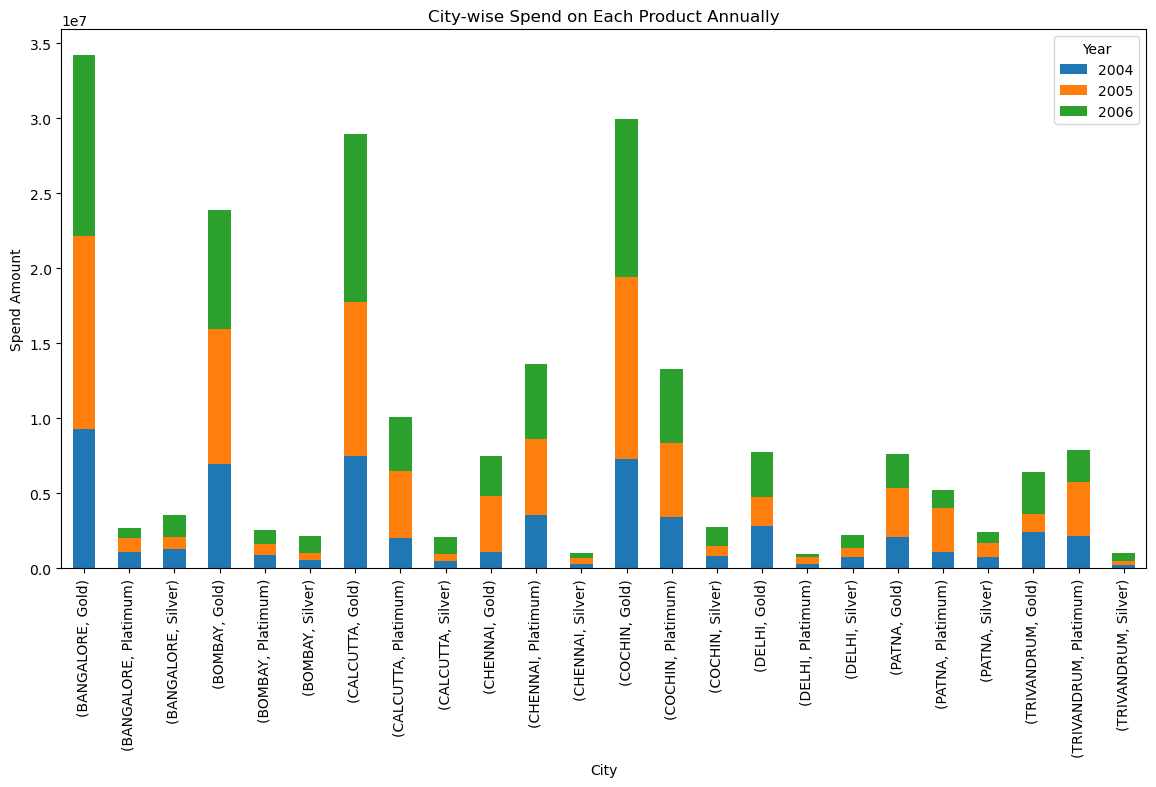

In [21]:
# graphical representation for the same
yearly_spend.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.xlabel('City')
plt.ylabel('Spend Amount')
plt.title('City-wise Spend on Each Product Annually')
plt.show()

## 4. Create graphs for
 ### a. Monthly comparison of total spends, city wise
 ### b. Comparison of yearly spend on air tickets
 ### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


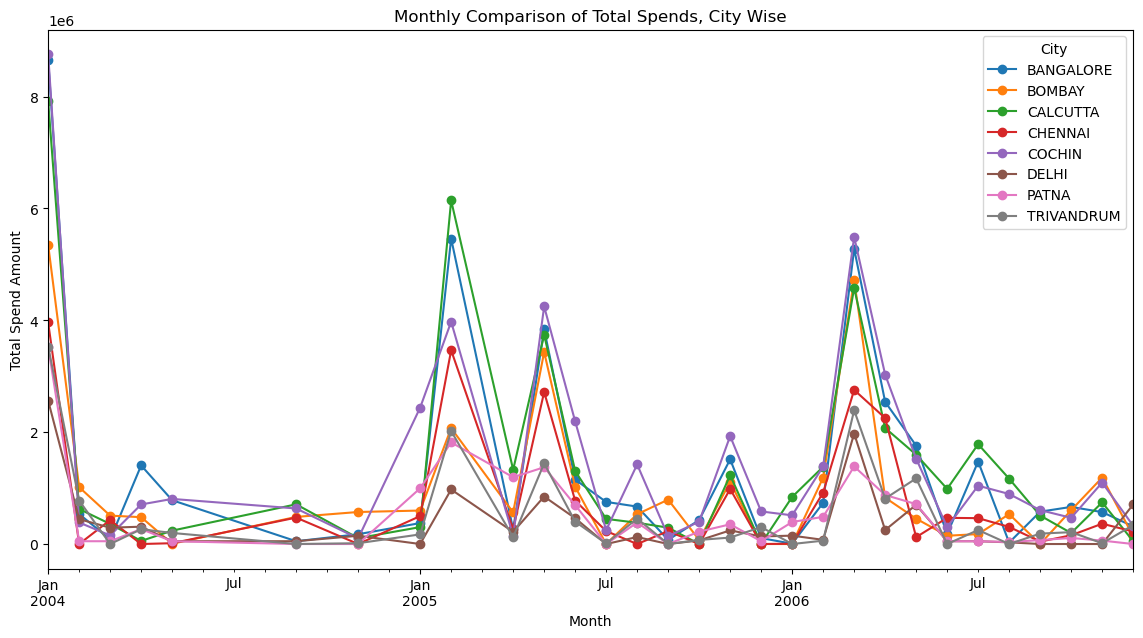

In [23]:
#a Monthly comparison of total spends, city wise
Customer_Spend['Year-Month'] = Customer_Spend['Month'].dt.to_period('M')
monthly_city = Customer_Spend.groupby(['City', 'Year-Month']).Amount.sum().unstack(fill_value=0).T
monthly_city.plot(kind='line', figsize=(14, 7), marker='o')
plt.xlabel('Month')
plt.ylabel('Total Spend Amount')
plt.title('Monthly Comparison of Total Spends, City Wise')
plt.show()

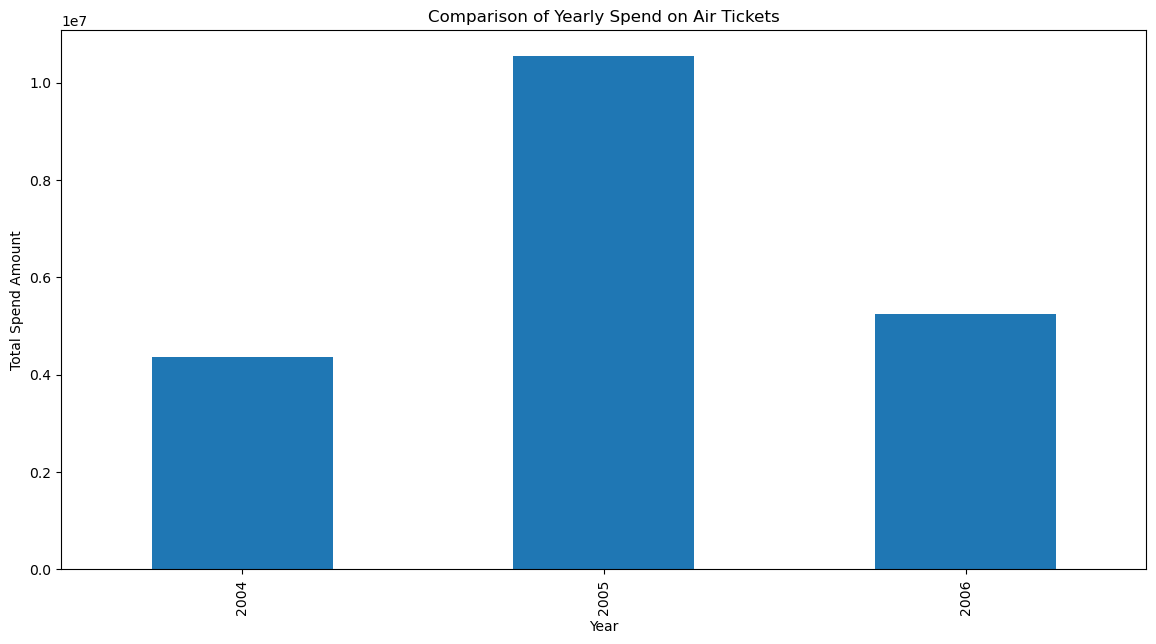

In [24]:
# Filter data for Air Tickets
air_ticket = Customer_Spend[Customer_Spend['Type'] == 'AIR TICKET']
yearly_spend = air_ticket.groupby('Year').Amount.sum()
# Plot the yearly comparison of Air Ticket spend
yearly_spend.plot(kind='bar', figsize=(14, 7))
plt.xlabel('Year')
plt.ylabel('Total Spend Amount')
plt.title('Comparison of Yearly Spend on Air Tickets')
plt.show()


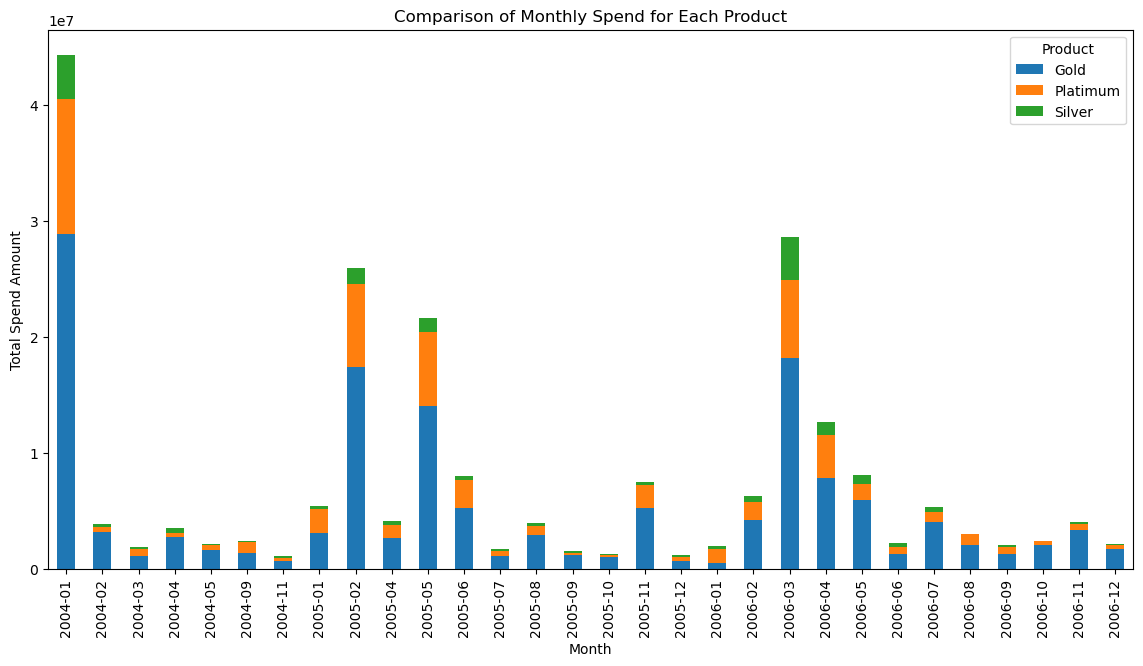

In [25]:
# # Group by Product and YearMonth, and calculate the total spend
monthly_product_spend = Customer_Spend.groupby(['Product', 'Year-Month'])['Amount'].sum().unstack(fill_value=0)

# # Plot the monthly spend for each product to look for seasonality
monthly_product_spend.T.plot(kind='bar',stacked =True, figsize=(14, 7))
plt.xlabel('Month')
plt.ylabel('Total Spend Amount')
plt.title('Comparison of Monthly Spend for Each Product')
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [27]:
Customer_Repayment['Month'] = pd.to_datetime(Customer_Spend['Month'], errors='coerce')
Customer_Repayment['yearly']=Customer_Repayment.Month.apply(lambda x:x.year)
Customer_Repayment['monthly']=Customer_Repayment.Month.apply(lambda x:x.month)
def top10Customers(product_category,time_period):
    return Customer_Repayment.loc[(Customer_Repayment.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: ")).capitalize()
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))
top10Customers_Analysis=top10Customers(product_category,time_period)
top10Customers_Analysis

Please Enter Product Category and product category should be in Gold/Silver/Platinum:  Gold
Please Enter Time Period and time period should be in yearly/monthly:  monthly


,Customer,City,Product,monthly,Amount
36,A13,BANGALORE,Gold,2,3323780.37
152,A43,BANGALORE,Gold,3,2400312.38
0,A1,BANGALORE,Gold,1,2383878.62
107,A29,CALCUTTA,Gold,1,2250535.75
186,A61,COCHIN,Gold,1,2214439.61
176,A60,CALCUTTA,Gold,1,2197119.19
167,A45,COCHIN,Gold,1,2078768.79
49,A14,BANGALORE,Gold,5,1992026.58
158,A44,DELHI,Gold,1,1942505.13
103,A28,TRIVANDRUM,Gold,5,1937414.15
